# **Homework 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests, urllib
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# resp = requests.get(url)
# car_fuel_efficiency_data = resp.content

In [3]:
# csv_file = open('car_fuel_efficiency.csv', 'wb')
# csv_file.write(car_fuel_efficiency_data)

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## ****Exploratory Data Analysis****

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [7]:
for col in df.columns:
    print(f"For column {col}: {df[col].unique()[:5]} \n")

For column engine_displacement: [170 130 220 210 190] 

For column num_cylinders: [ 3.  5. nan  4.  1.] 

For column horsepower: [159.  97.  78.  nan 140.] 

For column vehicle_weight: [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999] 

For column acceleration: [17.7 17.8 15.1 20.2 14.4] 

For column model_year: [2003 2007 2018 2009 2008] 

For column origin: ['Europe' 'USA' 'Asia'] 

For column fuel_type: ['Gasoline' 'Diesel'] 

For column drivetrain: ['All-wheel drive' 'Front-wheel drive'] 

For column num_doors: [ 0.  2. -1.  1. nan] 

For column fuel_efficiency_mpg: [13.23172891 13.68821744 14.246341   16.9127356  12.48836912] 



In [8]:
usedFeats = df[['engine_displacement', 'horsepower', 'vehicle_weight', 
                'model_year', 'fuel_efficiency_mpg']]

### Distribution of fuel_efficiency_mpg 

<Figure size 1500x800 with 0 Axes>

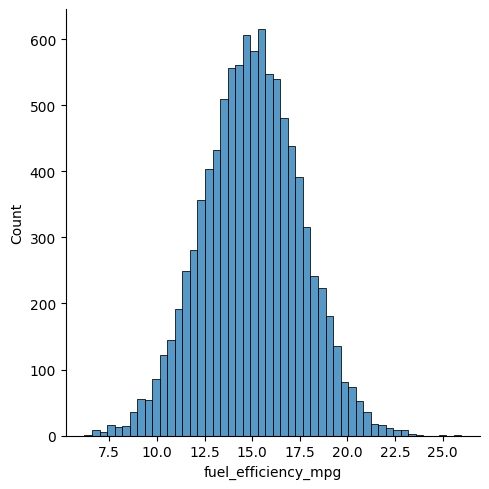

In [9]:
plt.figure(figsize=(15, 8))
sns.displot(usedFeats.fuel_efficiency_mpg , bins=50)

### Missing Values

In [10]:
usedFeats.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Median (50% Percentile) for variable 'horsepower'?

In [11]:
usedFeats.horsepower.median(skipna=True)

np.float64(149.0)

### Prepare and split the dataset

In [12]:
def trainValidateTest_Shuffle(df: pd.DataFrame, partitions: float, seed: np.integer):
    """
        This is a function use for splitting dataset into train, validation, and test.
        Train: 
        Validation: 
        Test: 
    """
    
    n = len(df)
    n_val = int(n * partitions)
    n_test = int(n * partitions)
    n_train = n - n_val - n_test
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    return df_train, df_val, df_test

In [13]:
trainSet, valSet, testSet = trainValidateTest_Shuffle(usedFeats, 0.2, 42)

In [14]:
trainSet = trainSet.reset_index(drop=True)
valSet = valSet.reset_index(drop=True)
testSet = testSet.reset_index(drop=True)

In [15]:
y_train = np.log1p(trainSet.fuel_efficiency_mpg.values)
y_val = np.log1p(valSet.fuel_efficiency_mpg.values)
y_test = np.log1p(testSet.fuel_efficiency_mpg.values)

del trainSet['fuel_efficiency_mpg']
del valSet['fuel_efficiency_mpg']
del testSet['fuel_efficiency_mpg']

In [16]:
trainSet, valSet, testSet

(      engine_displacement  horsepower  vehicle_weight  model_year
 0                     220       144.0     2535.887591        2009
 1                     160       141.0     2741.170484        2019
 2                     230       155.0     2471.880237        2017
 3                     150       206.0     3748.164469        2015
 4                     300       111.0     2135.716359        2006
 ...                   ...         ...             ...         ...
 5819                  260       139.0     2606.972984        2009
 5820                  280       132.0     4004.214323        2014
 5821                  210       152.0     2500.175687        2020
 5822                  250       154.0     2254.313245        2002
 5823                  210       152.0     2435.203606        2004
 
 [5824 rows x 4 columns],
       engine_displacement  horsepower  vehicle_weight  model_year
 0                     180       112.0     2772.134410        2020
 1                     260       1

In [17]:
y_train, y_val, y_test

(array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017], shape=(5824,)),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377], shape=(1940,)),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043], shape=(1940,)))

## **Comparison of Mean Imputation and Zero Imputation**

In [18]:
def prepareX(df : pd.DataFrame, fillna : str = 'zero'):
    
    df_copy = df.copy()

    if fillna.lower() == 'zero':
        df_copy.horsepower = df_copy.horsepower.fillna(0)
    elif fillna.lower() == 'mean':
        df_copy.horsepower = df_copy.horsepower.fillna(df_copy.horsepower.mean())

    X = df_copy.values

    return X

def trainingLinearRegression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1) # This is an example of the approximated matrix

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w_sub = w_full[1:]
    
    return w0, w_sub

def RMSE(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Zero Imputation

In [19]:
X_train_zero = prepareX(trainSet, fillna='zero')
pd.DataFrame(X_train_zero, columns=['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']).isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [20]:
w0, w = trainingLinearRegression(X_train_zero, y_train)

X_val_zero = prepareX(valSet, fillna='zero')
y_pred_zero = w0 + X_val_zero.dot(w)

np.round(RMSE(y_val, y_pred_zero), 2)

np.float64(0.04)

<Axes: ylabel='Count'>

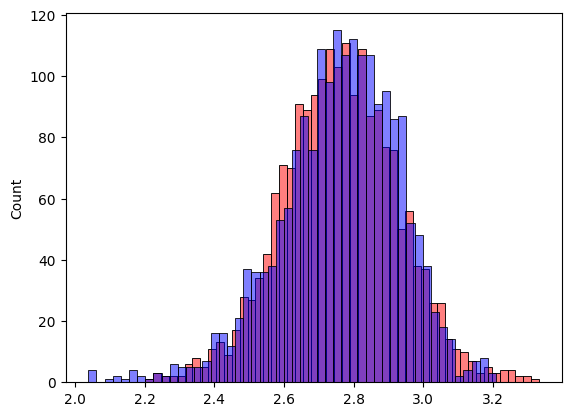

In [21]:
sns.histplot(y_pred_zero, color='red', alpha=.5, bins=50)
sns.histplot(y_val, color='blue', alpha=.5, bins=50)

## Mean Imputation

In [22]:
X_train_mean = prepareX(trainSet, fillna='mean')
X_train_mean

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [23]:
w0, w = trainingLinearRegression(X_train_mean, y_train)

X_val_mean = prepareX(valSet, fillna='mean')
y_pred_mean = w0 + X_val_mean.dot(w)

np.round(RMSE(y_val, y_pred_mean), 2)

np.float64(0.04)

<Axes: ylabel='Count'>

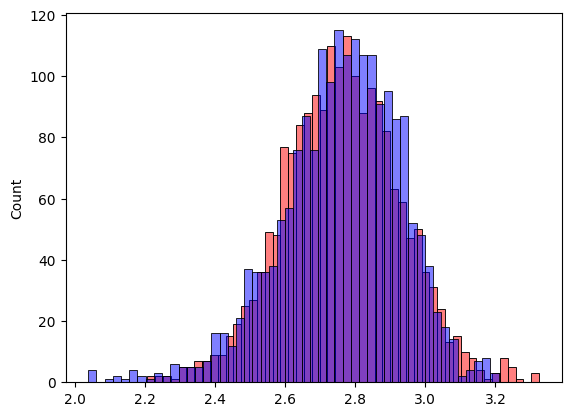

In [24]:
sns.histplot(y_pred_mean, color='red', alpha=.5, bins=50)
sns.histplot(y_val, color='blue', alpha=.5, bins=50)